# Import datas

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits['data']
Y = digits['target']

X.shape, Y.shape

((1797, 64), (1797,))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

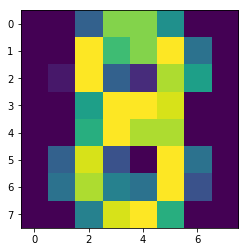

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(8,8))
plt.show()

# Define model

In [16]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.initializers import RandomUniform, Zeros
from keras.activations import relu, softmax
from tensorflow.keras.metrics import sparse_categorical_crossentropy

kernel_initializer = RandomUniform(minval=-1, maxval=1)
bias_initializer = Zeros()


dense1 = Dense(16, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
relu1 = Activation('relu')
dropout1 = Dropout(0.3)
dense2 = Dense(10, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer)
softmax1 = Activation('softmax')

input = Input(shape=(64,))

out = input
out = dense1(out)
out = relu1(out)
out = dropout1(out)
out = dense2(out)
out = softmax1(out)


model = Model(input, out)

model.summary()
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9)

def crossentropy(x, y): 
    return sparse_categorical_crossentropy(x, y, from_logits=True)

model.compile(optimizer=optimizer, loss=crossentropy, metrics=['sparse_categorical_accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


# Train model

In [17]:
hist = model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=1000,
          batch_size=128,
          verbose=0
         )

# Results

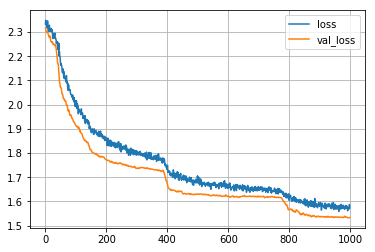

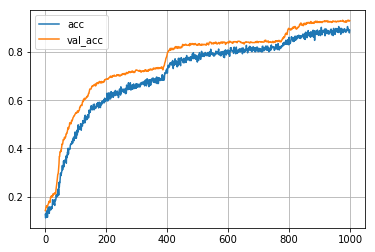

In [18]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
#plt.yscale('log')
plt.grid(which='both')
plt.show()

plt.plot(model.history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(model.history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.legend()
#plt.yscale('log')
plt.grid(which='both')
plt.show()